In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

sns.set(context='notebook', style='whitegrid')

np.set_printoptions(suppress=True) # Suppress scientific notation where possible

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import StratifiedKFold

pd.options.display.max_columns = None
import pprint
import csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn_pandas import DataFrameMapper


<B> Classification on the iris dataset with two classifiers: kNN and logistic</B>

In [4]:
# Read in my CSV/DATAFRAME

Asteroid_Data = pd.read_csv ('Asteroid_Data_Cleaned_136889.csv')

/Users/rachelbryn/opt/anaconda3/envs/metis/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
Asteroid_Data

,Semi_major_axis_AU,Eccentricity,Inclination,Longitude_of_asc_node,Argument_of_perhelion,Perihelion_distance_AU,Aphelion_distance,Orbital_Period_Years,Absolute_Mag_Parameter,diameter,Earth_Min_Orbital_Intersect_Distance_AU,class,Mean_Motion_degrees_per_day,Orbital_Period_Days,Mean_Anomaly_Degrees
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,3.34,939.4,1.59478,MBA,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,4.13,545,1.23324,MBA,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,5.33,246.596,1.03454,MBA,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,3.20,525.4,1.13948,MBA,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,6.85,106.699,1.09589,MBA,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136884,3.171225,0.159119,27.098625,309.036573,19.746812,2.666623,3.675826,5.647402,16.20,3.793,1.66301,MBA,0.174527,2062.713583,164.999439
136885,2.548410,0.076071,11.593237,246.298656,170.090810,2.354549,2.742270,4.068291,17.30,2.696,1.36733,MBA,0.242270,1485.943371,145.319581
136886,3.146246,0.220559,17.966646,137.981403,180.898833,2.452313,3.840180,5.580811,16.80,2.917,1.43837,MBA,0.176610,2038.391053,174.609920
136887,3.051336,0.287449,14.456779,343.917822,342.614839,2.174231,3.928440,5.330196,17.20,3.271,1.16684,MBA,0.184914,1946.853973,175.708508


In [5]:
# Create a dummy columns for my target variables
Asteroid_Data['Asteroid_Orbit_Class'] = Asteroid_Data['class'].str.contains('MBA', na=False).astype(int)

In [28]:
Asteroid_Data

,Semi_major_axis_AU,Eccentricity,Inclination,Longitude_of_asc_node,Argument_of_perhelion,Perihelion_distance_AU,Aphelion_distance,Orbital_Period_Years,Absolute_Mag_Parameter,diameter,Earth_Min_Orbital_Intersect_Distance_AU,class,Mean_Motion_degrees_per_day,Orbital_Period_Days,Mean_Anomaly_Degrees,Asteroid_Orbit_Class
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,3.34,939.4,1.59478,MBA,0.213885,1683.145708,77.372096,1
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,4.13,545,1.23324,MBA,0.213503,1686.155999,59.699133,1
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,5.33,246.596,1.03454,MBA,0.226019,1592.787285,34.925016,1
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,3.20,525.4,1.13948,MBA,0.271609,1325.432765,95.861936,1
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,6.85,106.699,1.09589,MBA,0.238632,1508.600458,282.366289,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136884,3.171225,0.159119,27.098625,309.036573,19.746812,2.666623,3.675826,5.647402,16.20,3.793,1.66301,MBA,0.174527,2062.713583,164.999439,1
136885,2.548410,0.076071,11.593237,246.298656,170.090810,2.354549,2.742270,4.068291,17.30,2.696,1.36733,MBA,0.242270,1485.943371,145.319581,1
136886,3.146246,0.220559,17.966646,137.981403,180.898833,2.452313,3.840180,5.580811,16.80,2.917,1.43837,MBA,0.176610,2038.391053,174.609920,1
136887,3.051336,0.287449,14.456779,343.917822,342.614839,2.174231,3.928440,5.330196,17.20,3.271,1.16684,MBA,0.184914,1946.853973,175.708508,1


In [45]:
Asteroid_Data['class'].value_counts()

MBA    125745
OMB      7455
TJN      1873
IMB       565
APO       485
MCA       336
AMO       268
ATE        95
CEN        48
TNO        13
AST         6
Name: class, dtype: int64

In [ ]:
# Remove ATE, CEN, TNO, AST 

In [36]:
# How do I get a count of the different classes in 'class'
# I want to understand how inbalanced my dataset really is 
Asteroid_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136889 entries, 0 to 136888
Data columns (total 16 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Semi_major_axis_AU                       136889 non-null  float64
 1   Eccentricity                             136889 non-null  float64
 2   Inclination                              136889 non-null  float64
 3   Longitude_of_asc_node                    136889 non-null  float64
 4   Argument_of_perhelion                    136889 non-null  float64
 5   Perihelion_distance_AU                   136889 non-null  float64
 6   Aphelion_distance                        136889 non-null  float64
 7   Orbital_Period_Years                     136889 non-null  float64
 8   Absolute_Mag_Parameter                   136889 non-null  float64
 9   diameter                                 136889 non-null  object 
 10  Earth_Min_Orbital_Intersect_Dist

In [8]:
# Identify my X.
# My X is my dataframe with the classifying Y target column removed
X = Asteroid_Data.drop(['class','Asteroid_Orbit_Class'], axis=1)

In [7]:
# Specify my Y 
y = Asteroid_Data['Asteroid_Orbit_Class']

In [9]:
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
mapper = DataFrameMapper([(X_train.columns, StandardScaler())])
scaled_X_train = mapper.fit_transform(X_train.copy())
scaled_X_train_df = pd.DataFrame(scaled_X_train, columns=X_train.columns)
scaled_X_test = mapper.fit_transform(X_test.copy())
scaled_X_test_df = pd.DataFrame(scaled_X_test, columns=X_test.columns)

In [11]:
#Perform KNN and evaluate model on the training data
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(scaled_X_train_df, y_train)
y_train_pred = knn.predict(scaled_X_train_df)
print(accuracy_score(y_train, y_train_pred))
print(recall_score(y_train, y_train_pred))
print(precision_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.f1_score(y_train, y_train_pred))

0.9684050004109176
0.9973048770785266
0.9691794723108147
0.9684050004109176
0.98304104459323


In [12]:
#Evaluate model on the test data
knn.fit(scaled_X_test_df, y_test)
y_test_pred = knn.predict(scaled_X_test)
print(accuracy_score(y_test, y_test_pred))
print(recall_score(y_test, y_test_pred))
print(precision_score(y_test, y_test_pred))
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.f1_score(y_test, y_test_pred))

0.967090364526262
0.9982931766760608
0.9670101507228545
0.967090364526262
0.9824026874475108


<B> NOW I'M GOING TO DO A QUICK TEST TO SEE WHICH MODEL I SHOULD FOCUS ON BECAUSE I ONLY HAVE TWO DAYS </B>

In [13]:
def quick_test(model, X, y):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
    model.fit(xtrain, ytrain)
    return model.score(xtest, ytest)

def quick_test_afew_times(model, X, y, n=10):
    return np.mean([quick_test(model, X, y) for j in range(n)])

In [14]:
logreg = LogisticRegression(max_iter = 1000, C = 1000)
print(quick_test(logreg, X, y))
print(quick_test_afew_times(logreg, X, y))

/Users/rachelbryn/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9807631431563055


/Users/rachelbryn/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rachelbryn/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

0.9651642437967224


/Users/rachelbryn/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
decisiontree = DecisionTreeClassifier(max_depth=10)
randomforest = RandomForestClassifier (max_depth=10)

In [16]:
logreg.fit(X_train, y_train)
knn.fit(X_train, y_train)
decisiontree.fit(X_train, y_train)
randomforest.fit(X_train, y_train)

print('Logistic regression validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy_score(y_test, logreg.predict(X_test)), 
         precision_score(y_test, logreg.predict(X_test)), 
         recall_score(y_test, logreg.predict(X_test)),
         f1_score(y_test, logreg.predict(X_test))))

print('\n')

print('5 nearest neighbors validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy_score(y_test, knn.predict(X_test)), 
         precision_score(y_test, knn.predict(X_test)), 
         recall_score(y_test, knn.predict(X_test)),
         f1_score(y_test, knn.predict(X_test))))

print('\n')

print('Decisiontree max depth 10 validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy_score(y_test, decisiontree.predict(X_test)), 
         precision_score(y_test, decisiontree.predict(X_test)), 
         recall_score(y_test, decisiontree.predict(X_test)),
         f1_score(y_test, decisiontree.predict(X_test))))

print('\n')

print('Random Forest max depth 10 validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy_score(y_test, randomforest.predict(X_test)), 
         precision_score(y_test, randomforest.predict(X_test)), 
         recall_score(y_test, randomforest.predict(X_test)),
         f1_score(y_test, randomforest.predict(X_test))))

/Users/rachelbryn/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic regression validation metrics: 
 Accuracy: 0.9816 
 Precision: 0.9847 
 Recall: 0.9955 
 F1: 0.9901


5 nearest neighbors validation metrics: 
 Accuracy: 0.9889 
 Precision: 0.9902 
 Recall: 0.9979 
 F1: 0.9940


Decisiontree max depth 10 validation metrics: 
 Accuracy: 1.0000 
 Precision: 1.0000 
 Recall: 1.0000 
 F1: 1.0000


Random Forest max depth 10 validation metrics: 
 Accuracy: 1.0000 
 Precision: 1.0000 
 Recall: 1.0000 
 F1: 1.0000


<B> Random forests have many many degrees of freedom, so it is relatively easy for them to get to the point that they have near 100% accuracy in-sample. This is merely an overfitting problem. Likely you want to use some tuning parameters to reduce the model complexity some (reduce tree depth, raise minimal node size, etc). Some degree of cross-validation would help you here. Alternatively, it still has the best oob performance, so you can just use it anyhow. </B>

In [17]:
preds = randomforest.predict(X_test)

In [18]:
## Create a confusion matrix 

log_matrix = confusion_matrix(y_test, preds)
log_matrix

array([[ 2185,     0],
       [    0, 25193]])

<AxesSubplot:>

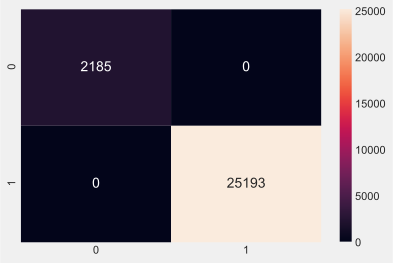

In [19]:
sns.heatmap(log_matrix, annot = True, fmt='d') 